In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
# Any results you write to the current directory are saved as output.


['test.csv.zip', 'sample_submission.csv', 'train.csv', 'test.csv', 'sample_submission.csv.zip', 'description.md', 'train.csv.zip', 'train.zip', 'spooky-author-identification']


In [3]:
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Dense, Input, Dropout, Bidirectional, GlobalMaxPool1D, Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


2025-08-18 21:50:10.323955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755553810.339395       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755553810.344000       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-18 21:50:10.360817: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [4]:
data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')


In [5]:
data.head()


,id,text,author
0,id06121,So I did not abandon the search until I had be...,EAP
1,id01074,He had promised to spend some hours with me on...,MWS
2,id12145,In the end he give him a funny kind o' thingum...,HPL
3,id18286,What other construction could I possibly put u...,EAP
4,id11118,"I had heard the noise, however faint, and my s...",EAP


<Axes: xlabel='author'>

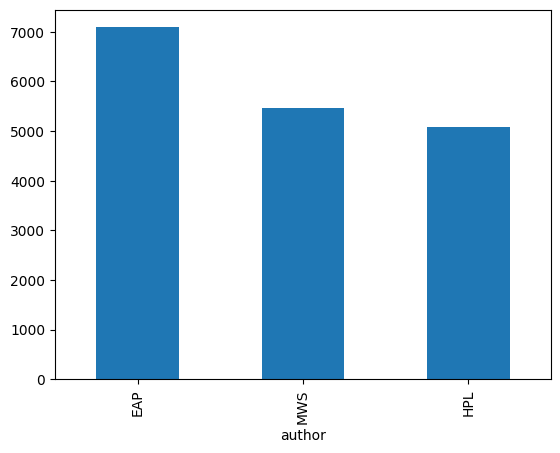

In [6]:
data.author.value_counts().plot(kind = 'bar')


In [7]:
data_length = data.text.apply(len)
data_length.head()


0    115
1    105
2    185
3    267
4     73
Name: text, dtype: int64

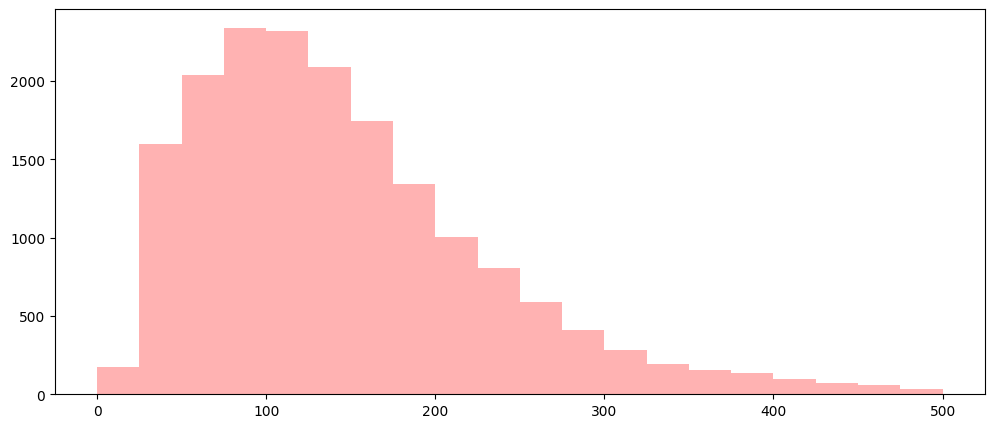

In [8]:
plt.figure(figsize = (12, 5))
plt.hist(data_length, bins = 20, range = [0, 500], color = 'r', alpha = 0.3)
plt.show()


In [9]:
data_split_length = data.text.apply(lambda x : len(x.split(" ")))
data_split_length.head()


0    23
1    19
2    40
3    47
4    14
Name: text, dtype: int64

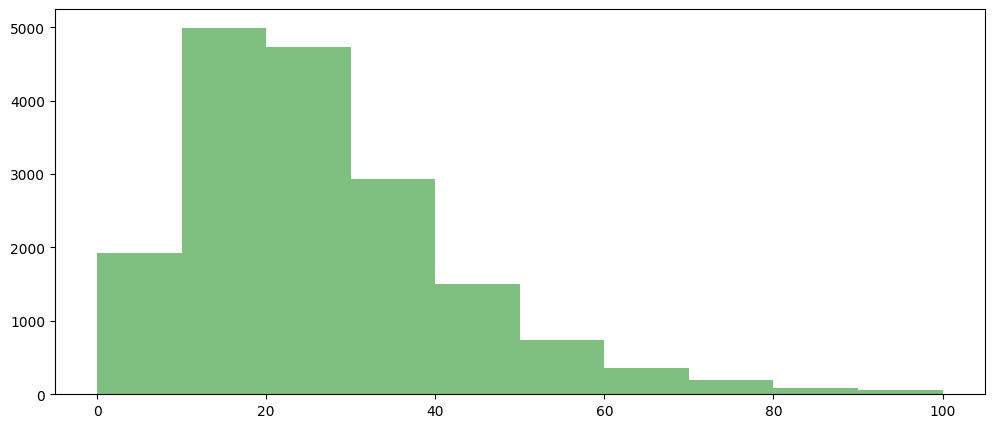

In [10]:
plt.figure(figsize = (12, 5))
plt.hist(data_split_length, bins = 10, range = [0, 100], color = 'g', alpha = 0.5)
plt.show()


In [11]:
print("data_length max : ", np.max(data_length))
print("data_length min : ", np.min(data_length))
print("data_length mean : ", np.mean(data_length))
print("data_length 75% : ", np.percentile(data_length, 75))
print("data_length 90% : ", np.percentile(data_length, 90))


data_length max :  4663
data_length min :  21
data_length mean :  148.75075194370353
data_length 75% :  191.0
data_length 90% :  267.0


In [12]:
print("data_split_length max : ", np.max(data_split_length))
print("data_split_length min : ", np.min(data_split_length))
print("data_split_length mean : ", np.mean(data_split_length))
print("data_split_length 75% : ", np.percentile(data_split_length, 75))
print("data_split_length 90% : ", np.percentile(data_split_length, 90))


data_split_length max :  861
data_split_length min :  2
data_split_length mean :  26.6826513818739
data_split_length 75% :  34.0
data_split_length 90% :  47.0


(-0.5, 399.5, 199.5, -0.5)

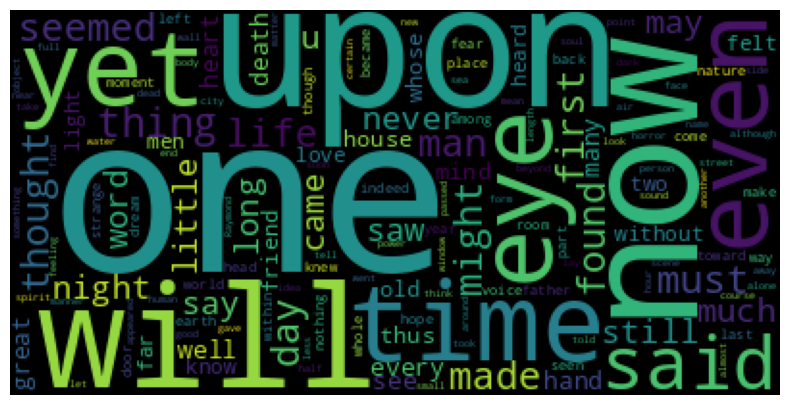

In [13]:
cloud = WordCloud(width = 400, height = 200).generate(" ".join(data.text))
plt.figure(figsize = (12, 5))
plt.imshow(cloud)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

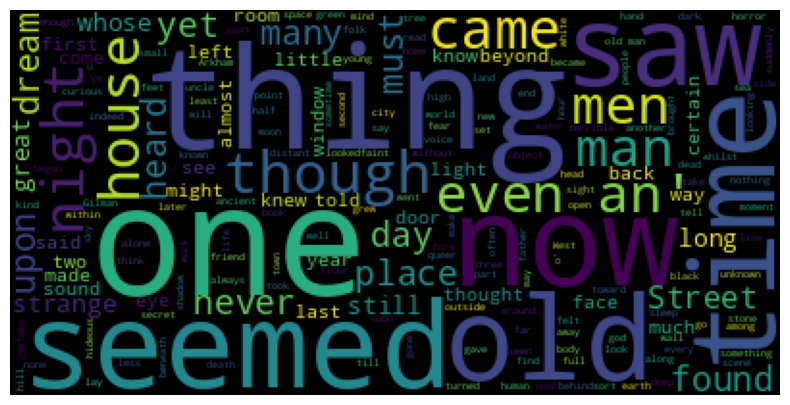

In [14]:
cloud = WordCloud(width = 400, height = 200).generate(" ".join(data[data["author"] == 'HPL']['text']))
plt.figure(figsize = (12, 5))
plt.imshow(cloud)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

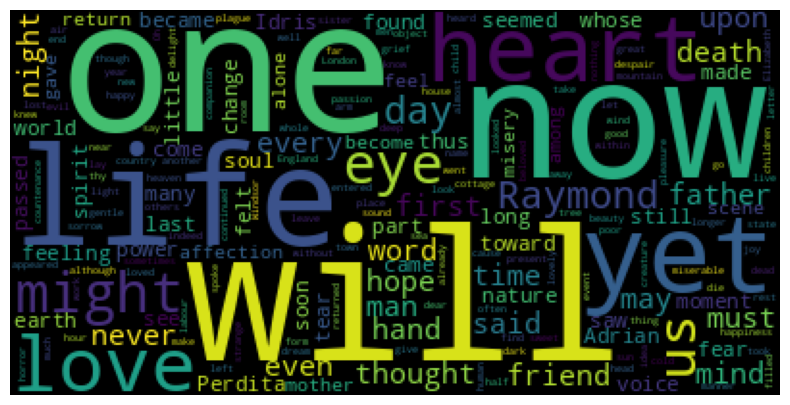

In [15]:
cloud = WordCloud(width = 400, height = 200).generate(" ".join(data[data["author"] == 'MWS']['text']))
plt.figure(figsize = (12, 5))
plt.imshow(cloud)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

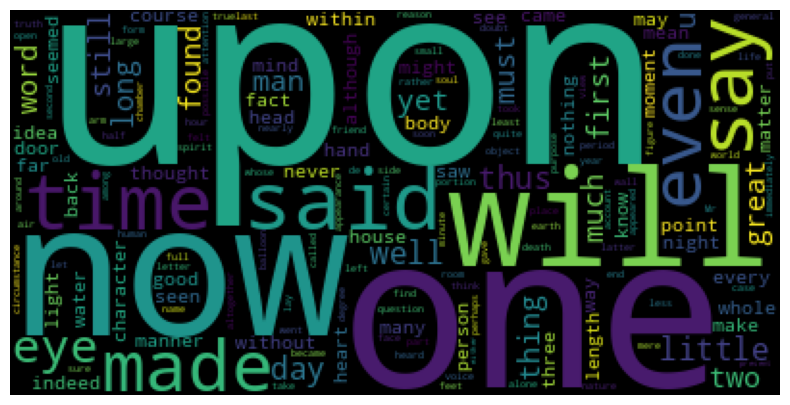

In [16]:
cloud = WordCloud(width = 400, height = 200).generate(" ".join(data[data["author"] == 'EAP']['text']))
plt.figure(figsize = (12, 5))
plt.imshow(cloud)
plt.axis('off')


In [17]:
le = LabelEncoder()
le.fit(data.author)
y = le.transform(data.author)


In [18]:
y[:10]


array([0, 2, 1, 0, 0, 1, 2, 0, 0, 1])

In [19]:
y = to_categorical(y)


NameError: name 'to_categorical' is not defined

In [20]:
y[:10]


array([0, 2, 1, 0, 0, 1, 2, 0, 0, 1])

In [21]:
num_words = 5000
max_len = 50
emb_size = 64


In [22]:
tok = Tokenizer(num_words = num_words)
tok.fit_on_texts(list(data.text))


NameError: name 'Tokenizer' is not defined

In [23]:
X = tok.texts_to_sequences(data.text)
X_test = tok.texts_to_sequences(test_data.text)


NameError: name 'tok' is not defined

In [24]:
X = sequence.pad_sequences(X, maxlen = max_len)
X_test = sequence.pad_sequences(X_test, maxlen = max_len)


NameError: name 'X' is not defined

In [25]:
X[0]


NameError: name 'X' is not defined

In [26]:
def model():
    inp = Input(shape = (max_len, ))
    layer = Embedding(num_words, emb_size)(inp)
    layer = Bidirectional(LSTM(50, return_sequences = True, recurrent_dropout = 0.2))(layer)
    layer = GlobalMaxPool1D()(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(16, activation = 'relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(3, activation = 'softmax')(layer)
    model = Model(inputs = inp, outputs = layer)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model


In [27]:
model = model()
model.summary()


2025-08-18 21:50:18.696390: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 50, 64)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 100)        │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,667 (1.40 MB)

 Trainable params: 367,667 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)


NameError: name 'EarlyStopping' is not defined

In [29]:
hist = model.fit(X, y, batch_size = 32, epochs = 3, validation_split = 0.2, callbacks = [early_stop])


NameError: name 'X' is not defined

In [30]:
vloss = hist.history['val_loss']
loss = hist.history['loss']

x_len = np.arange(len(loss))

plt.plot(x_len, vloss, marker = '.', color = 'r', label = 'val_loss')
plt.plot(x_len, loss, marker = '.', color = 'b', label = 'loss')
plt.legend()
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


NameError: name 'hist' is not defined

In [31]:
results = model.predict(X_test)
ids = test_data['id']
results = pd.DataFrame(results, columns=['EAP', 'HPL','MWS'])
results.insert(0, "id", ids)
results.head()


NameError: name 'X_test' is not defined

In [32]:
results.to_csv("my_submission.csv", index=False)


NameError: name 'results' is not defined